In [33]:
import pandas as pd
from uszipcode import ZipcodeSearchEngine
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [78]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:

# Note that you'll have to paste our API key here. I haven't included it since this will go to the Github repo
client = Socrata("data.lacity.org", "LLaYxNjJnTyIyES7N63sJAUDv")


#Only getting the first 1000 rows to ease computational requirements but when we have all of our codes written
#we should grab the full dataset.
result_list = client.get("7fvc-faax", limit=200000)

# Convert to pandas DataFrame
crime_df = pd.DataFrame.from_records(result_list)
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,01,Central,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2017-11-02T00:00:00.000,2017-11-02T00:00:00.000,170101261,1800 S BROADWAY,"{'type': 'Point', 'coordinates': [-118.2647, 3...",0329 2004,203,OTHER BUSINESS,0195,IC,Invest Cont,2130,58,H,M,NaN,NaN
1,01,Central,888,888,NaN,NaN,NaN,TRESPASSING,ALAMEDA ST,2017-10-30T00:00:00.000,2017-10-30T00:00:00.000,170128267,LOS ANGELES ST,"{'type': 'Point', 'coordinates': [-118.2318, 3...",0910 2028 1501 2004,135,MTA PROPERTY OR PARKING LOT,0119,IC,Invest Cont,2230,48,H,M,NaN,NaN
2,20,Olympic,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2018-06-30T00:00:00.000,2018-06-30T00:00:00.000,182013514,800 S KENMORE AV,"{'type': 'Point', 'coordinates': [-118.2981, 3...",0329,122,"VEHICLE, PASSENGER/TRUCK",2045,IC,Invest Cont,0205,32,H,M,NaN,NaN
3,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,NaN,2017-11-01T00:00:00.000,2017-11-01T00:00:00.000,170128444,300 S SANTA FE AV,"{'type': 'Point', 'coordinates': [-118.2326, 3...",1609 1307 0358 0344,101,STREET,0139,IC,Invest Cont,1730,20,H,M,NaN,NaN
4,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,SAN PEDRO ST,2017-11-01T00:00:00.000,2017-11-01T00:00:00.000,170128445,3RD ST,"{'type': 'Point', 'coordinates': [-118.2411, 3...",0344 1609 1307 0358,101,STREET,0138,IC,Invest Cont,2200,22,H,F,NaN,NaN


In [79]:
# Converting "date_occ" row to a datetime object
crime_df["date_occ"]=pd.to_datetime(crime_df["date_occ"])

#IGNORE THIS
#Strip month and year from date
#converted_dates = []
#for date in crime_df["date_occ"]:
    #converted_time = datetime.strptime(date, "Y%-%m-%d")
    #converted_dates.append(converted_time)

#Create new columns in Crime dataframe for Month and Year
crime_df["Month"] = [date.month for date in crime_df["date_occ"]]
crime_df["Year"] = [date.year for date in crime_df["date_occ"]]
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year
0,01,Central,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2017-11-02,2017-11-02T00:00:00.000,170101261,1800 S BROADWAY,"{'type': 'Point', 'coordinates': [-118.2647, 3...",0329 2004,203,OTHER BUSINESS,0195,IC,Invest Cont,2130,58,H,M,NaN,NaN,11,2017
1,01,Central,888,888,NaN,NaN,NaN,TRESPASSING,ALAMEDA ST,2017-10-30,2017-10-30T00:00:00.000,170128267,LOS ANGELES ST,"{'type': 'Point', 'coordinates': [-118.2318, 3...",0910 2028 1501 2004,135,MTA PROPERTY OR PARKING LOT,0119,IC,Invest Cont,2230,48,H,M,NaN,NaN,10,2017
2,20,Olympic,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2018-06-30,2018-06-30T00:00:00.000,182013514,800 S KENMORE AV,"{'type': 'Point', 'coordinates': [-118.2981, 3...",0329,122,"VEHICLE, PASSENGER/TRUCK",2045,IC,Invest Cont,0205,32,H,M,NaN,NaN,6,2018
3,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,NaN,2017-11-01,2017-11-01T00:00:00.000,170128444,300 S SANTA FE AV,"{'type': 'Point', 'coordinates': [-118.2326, 3...",1609 1307 0358 0344,101,STREET,0139,IC,Invest Cont,1730,20,H,M,NaN,NaN,11,2017
4,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,SAN PEDRO ST,2017-11-01,2017-11-01T00:00:00.000,170128445,3RD ST,"{'type': 'Point', 'coordinates': [-118.2411, 3...",0344 1609 1307 0358,101,STREET,0138,IC,Invest Cont,2200,22,H,F,NaN,NaN,11,2017


In [80]:
# Code to look at crime descriptions and their associated crime code
#All the numbers in this data set are stored as objects rather than intergers.
#We may want to convert all numeric columns to numbers but here I'm just converting the crime codes to numbers
crime_df["crm_cd"] = pd.to_numeric(crime_df["crm_cd"])

#Groups by crime description then look at average crime code. This matches 
crime_code = crime_df.groupby("crm_cd_desc")
crime_code = crime_code.mean()
crime_code = crime_code.drop(["Month","Year"], axis=1)
crime_code

,crm_cd
crm_cd_desc,
ABORTION/ILLEGAL,952.0
ARSON,648.0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,231.0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0
ATTEMPTED ROBBERY,220.0
BATTERY - SIMPLE ASSAULT,624.0
BATTERY ON A FIREFIGHTER,622.0
BATTERY POLICE (SIMPLE),623.0
BATTERY WITH SEXUAL CONTACT,860.0


In [81]:
lat = []
lon = []
split_lat_longs = []

# For each row in a varible,
for x in range(len(crime_df["location"])):
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        location = crime_df["location_1"][x]["coordinates"]
        split_lat_longs.append(location)
        lon.append(location[0])
        lat.append(location[1])
        # Split the row by comma and append
        # everything after the comma to lon
        #lon.append(location.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

crime_df["Latitude"] = lat
crime_df["Longitude"] = lon

In [ ]:
crime_df.to

In [82]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcodes = []
counter = 0
counter_2 = 0
for index, row in crime_df.iterrows():

    #Get zipcodes based on lat-longs
    try:
        crime_lat = row["Latitude"]
        crime_lon = row["Longitude"]
        zipcode = search.by_coordinate(crime_lat, crime_lon, returns=1)
        zipcodes.append(zipcode[0]["Zipcode"])
        counter_2 = counter_2+1
    except:
        zipcodes.append("NaN")
        counter = counter + 1
        print(f"{counter} exceptions identified on index {counter_2}")
        counter_2 = counter_2+1

crime_df["Zip Code"] = zipcodes

1 exceptions identified on index 1745
2 exceptions identified on index 1776
3 exceptions identified on index 1787
4 exceptions identified on index 1802
5 exceptions identified on index 1810
6 exceptions identified on index 1888
7 exceptions identified on index 1898
8 exceptions identified on index 1909
9 exceptions identified on index 1914
10 exceptions identified on index 1985
11 exceptions identified on index 2014
12 exceptions identified on index 2056
13 exceptions identified on index 2178
14 exceptions identified on index 2184
15 exceptions identified on index 2238
16 exceptions identified on index 2317
17 exceptions identified on index 2318
18 exceptions identified on index 2431
19 exceptions identified on index 2452
20 exceptions identified on index 2488
21 exceptions identified on index 2489
22 exceptions identified on index 2491
23 exceptions identified on index 2502
24 exceptions identified on index 2541
25 exceptions identified on index 2552
26 exceptions identified on index 

206 exceptions identified on index 48162
207 exceptions identified on index 48183
208 exceptions identified on index 48345
209 exceptions identified on index 48416
210 exceptions identified on index 48417
211 exceptions identified on index 48440
212 exceptions identified on index 48606
213 exceptions identified on index 48608
214 exceptions identified on index 48615
215 exceptions identified on index 48666
216 exceptions identified on index 48671
217 exceptions identified on index 48695
218 exceptions identified on index 48704
219 exceptions identified on index 48745
220 exceptions identified on index 48782
221 exceptions identified on index 48806
222 exceptions identified on index 48837
223 exceptions identified on index 48840
224 exceptions identified on index 48917
225 exceptions identified on index 48920
226 exceptions identified on index 48955
227 exceptions identified on index 48989
228 exceptions identified on index 49030
229 exceptions identified on index 49046
230 exceptions i

406 exceptions identified on index 74547
407 exceptions identified on index 74548
408 exceptions identified on index 74590
409 exceptions identified on index 74950
410 exceptions identified on index 75004
411 exceptions identified on index 75005
412 exceptions identified on index 75208
413 exceptions identified on index 75209
414 exceptions identified on index 75210
415 exceptions identified on index 75361
416 exceptions identified on index 75536
417 exceptions identified on index 75537
418 exceptions identified on index 75538
419 exceptions identified on index 75539
420 exceptions identified on index 75576
421 exceptions identified on index 75577
422 exceptions identified on index 75578
423 exceptions identified on index 75599
424 exceptions identified on index 75616
425 exceptions identified on index 75617
426 exceptions identified on index 75618
427 exceptions identified on index 75619
428 exceptions identified on index 75620
429 exceptions identified on index 75621
430 exceptions i

605 exceptions identified on index 104261
606 exceptions identified on index 104281
607 exceptions identified on index 104321
608 exceptions identified on index 104345
609 exceptions identified on index 104369
610 exceptions identified on index 104545
611 exceptions identified on index 104551
612 exceptions identified on index 104566
613 exceptions identified on index 104625
614 exceptions identified on index 104705
615 exceptions identified on index 104889
616 exceptions identified on index 104924
617 exceptions identified on index 104956
618 exceptions identified on index 104986
619 exceptions identified on index 104999
620 exceptions identified on index 105002
621 exceptions identified on index 105004
622 exceptions identified on index 105051
623 exceptions identified on index 105079
624 exceptions identified on index 105112
625 exceptions identified on index 105152
626 exceptions identified on index 105225
627 exceptions identified on index 105233
628 exceptions identified on index

805 exceptions identified on index 112688
806 exceptions identified on index 112702
807 exceptions identified on index 112746
808 exceptions identified on index 112780
809 exceptions identified on index 112902
810 exceptions identified on index 112906
811 exceptions identified on index 112919
812 exceptions identified on index 112942
813 exceptions identified on index 112970
814 exceptions identified on index 112980
815 exceptions identified on index 113032
816 exceptions identified on index 113094
817 exceptions identified on index 113113
818 exceptions identified on index 113125
819 exceptions identified on index 113133
820 exceptions identified on index 113217
821 exceptions identified on index 113324
822 exceptions identified on index 113364
823 exceptions identified on index 113388
824 exceptions identified on index 113405
825 exceptions identified on index 113486
826 exceptions identified on index 113520
827 exceptions identified on index 113524
828 exceptions identified on index

1001 exceptions identified on index 123530
1002 exceptions identified on index 123768
1003 exceptions identified on index 123774
1004 exceptions identified on index 123776
1005 exceptions identified on index 123806
1006 exceptions identified on index 123905
1007 exceptions identified on index 123908
1008 exceptions identified on index 124261
1009 exceptions identified on index 124753
1010 exceptions identified on index 124793
1011 exceptions identified on index 125209
1012 exceptions identified on index 125235
1013 exceptions identified on index 125326
1014 exceptions identified on index 125394
1015 exceptions identified on index 125423
1016 exceptions identified on index 125597
1017 exceptions identified on index 125609
1018 exceptions identified on index 125704
1019 exceptions identified on index 125789
1020 exceptions identified on index 125844
1021 exceptions identified on index 126045
1022 exceptions identified on index 126072
1023 exceptions identified on index 126091
1024 except

1192 exceptions identified on index 139578
1193 exceptions identified on index 139612
1194 exceptions identified on index 139665
1195 exceptions identified on index 139707
1196 exceptions identified on index 139772
1197 exceptions identified on index 139785
1198 exceptions identified on index 139930
1199 exceptions identified on index 140000
1200 exceptions identified on index 140040
1201 exceptions identified on index 140073
1202 exceptions identified on index 140105
1203 exceptions identified on index 140127
1204 exceptions identified on index 140220
1205 exceptions identified on index 140272
1206 exceptions identified on index 140303
1207 exceptions identified on index 140325
1208 exceptions identified on index 140396
1209 exceptions identified on index 140401
1210 exceptions identified on index 142078
1211 exceptions identified on index 142108
1212 exceptions identified on index 142368
1213 exceptions identified on index 142386
1214 exceptions identified on index 142406
1215 except

1385 exceptions identified on index 151874
1386 exceptions identified on index 152019
1387 exceptions identified on index 152022
1388 exceptions identified on index 152091
1389 exceptions identified on index 152129
1390 exceptions identified on index 152142
1391 exceptions identified on index 152155
1392 exceptions identified on index 152156
1393 exceptions identified on index 152290
1394 exceptions identified on index 152304
1395 exceptions identified on index 152327
1396 exceptions identified on index 152385
1397 exceptions identified on index 152439
1398 exceptions identified on index 152558
1399 exceptions identified on index 152560
1400 exceptions identified on index 152630
1401 exceptions identified on index 152688
1402 exceptions identified on index 152791
1403 exceptions identified on index 152797
1404 exceptions identified on index 152841
1405 exceptions identified on index 152896
1406 exceptions identified on index 152924
1407 exceptions identified on index 152925
1408 except

In [83]:
crime_df["Latitude"]

0         34.0328
1         34.0577
2         34.0561
3         34.0460
4         34.0467
5         34.0437
6         34.2011
7         34.0617
8         34.0449
9         34.0494
10        34.0502
11        34.0691
12        34.3149
13        34.0480
14        34.0480
15        34.0435
16        34.0483
17        34.0347
18        34.0408
19        34.0487
20        34.0421
21        34.0408
22        34.0449
23        34.0569
24        34.0478
25        34.0495
26        34.0317
27        34.0495
28        34.0454
29        34.0448
30        34.0483
31        34.0572
32        34.0519
33        34.0449
34        34.0461
35        34.0433
36        34.0502
37        34.0502
38        34.0599
39        34.0430
40        34.0490
41        34.0446
42        34.0438
43        34.0563
44        34.0458
45        34.0659
46        34.0663
47        34.1545
48        34.1971
49        34.0495
50        34.0511
51        34.0423
52        34.0495
53        34.0452
54        34.0420
55        

In [84]:
crime_df["crm_cd_desc"].value_counts()

VEHICLE - STOLEN                                                   17015
BATTERY - SIMPLE ASSAULT                                           16852
BURGLARY FROM VEHICLE                                              15475
BURGLARY                                                           12763
THEFT PLAIN - PETTY ($950 & UNDER)                                 12549
INTIMATE PARTNER - SIMPLE ASSAULT                                  11109
THEFT OF IDENTITY                                                  10311
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                      9288
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                     8672
ROBBERY                                                             7831
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                            7295
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114        7002
CRIMINAL THREATS - NO WEAPON DISPLAYED                              4848
SHOPLIFTING - PETTY THEFT ($950 & UNDER)           

In [85]:
violent_crimes = crime_df.loc[crime_df["crm_cd_desc"]=="CRIMINAL HOMICIDE"]

violent_crime_list = ["ARSON", "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER", "ASSAULT WITH DEADLY WEAPON", "AGGRAVATED ASSAULT", "ATTEMPTED ROBBERY", "BATTERY ON A FIREFIGHTER", "BATTERY POLICE (SIMPLE)", "BATTERY WITH SEXUAL CONTACT", "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT", "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT", "CHILD STEALING", "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060", "INTIMATE PARTNER - AGGRAVATED ASSAULT", "INTIMATE PARTNER - SIMPLE ASSAULT", "KIDNAPPING", "KIDNAPPING - GRAND ATTEMPT", "LYNCHING", "LYNCHING – ATTEMPTED", "MANSLAUGHTER, NEGLIGENT", "ORAL COPULATION", "OTHER ASSAULT", "RAPE, ATTEMPTED", "RAPE, FORCIBLE", "ROBBERY", "SEX, UNLAWFUL", "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059", "SEXUAL PENETRATION W/FOREIGN OBJECT", "SEXUAL PENTRATION WITH A FOREIGN OBJECT", "SHOTS FIRED AT INHABITED DWELLING", "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT", "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02", "THEFT, PERSON"]

for vc in violent_crime_list:
    v_temp = crime_df.loc[crime_df["crm_cd_desc"]==vc]
    violent_crimes = pd.concat([violent_crimes, v_temp])
    print(f"{vc} added to list")

ARSON added to list
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER added to list
ASSAULT WITH DEADLY WEAPON added to list
AGGRAVATED ASSAULT added to list
ATTEMPTED ROBBERY added to list
BATTERY ON A FIREFIGHTER added to list
BATTERY POLICE (SIMPLE) added to list
BATTERY WITH SEXUAL CONTACT added to list
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT added to list
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT added to list
CHILD STEALING added to list
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060 added to list
INTIMATE PARTNER - AGGRAVATED ASSAULT added to list
INTIMATE PARTNER - SIMPLE ASSAULT added to list
KIDNAPPING added to list
KIDNAPPING - GRAND ATTEMPT added to list
LYNCHING added to list
LYNCHING – ATTEMPTED added to list
MANSLAUGHTER, NEGLIGENT added to list
ORAL COPULATION added to list
OTHER ASSAULT added to list
RAPE, ATTEMPTED added to list
RAPE, FORCIBLE added to list
ROBBERY added to list
SEX, UNLAWFUL added to list
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRG

In [179]:
violent_crimes.to_csv("Violent_crimes.csv")

In [86]:
violent_crimes = violent_crimes.loc[violent_crimes["Year"]!=2018]

In [87]:
months = violent_crimes.groupby("Month").count()

In [88]:
months_axis  = ["Jan","Feb","Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

In [89]:
monthly_crime = months["area_name"]

<BarContainer object of 12 artists>

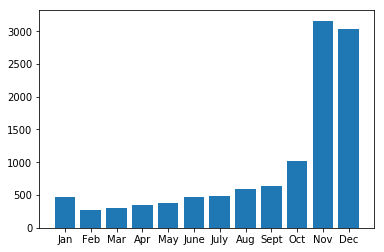

In [90]:
plt.bar(months_axis, monthly_crime)


In [91]:
years = violent_crimes.groupby("Year").count()

In [92]:
years_axis = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [93]:
yearly_crime = years["area_name"]

<BarContainer object of 8 artists>

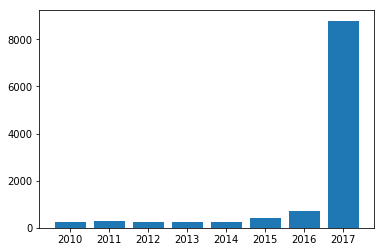

In [94]:
plt.bar(years_axis, yearly_crime)

In [95]:
crime_2010 = violent_crimes.loc[violent_crimes["Year"]==2010]
crime_2010 = crime_2010.groupby("Zip Code").count().reset_index()
crime_2010 = crime_2010[["Zip Code", "crm_cd_1"]]
crime_2010 = crime_2010.rename(columns={"crm_cd_1": "2010 Crime count"})

crime_2011 = violent_crimes.loc[violent_crimes["Year"]==2011]
crime_2011 = crime_2011.groupby("Zip Code").count().reset_index()
crime_2011 = crime_2011[["Zip Code", "crm_cd_1"]]
crime_2011 = crime_2011.rename(columns={"crm_cd_1": "2011 Crime count"})


crime_2012 = violent_crimes.loc[violent_crimes["Year"]==2012]
crime_2012 = crime_2012.groupby("Zip Code").count().reset_index()
crime_2012 = crime_2012[["Zip Code", "crm_cd_1"]]
crime_2012 = crime_2012.rename(columns={"crm_cd_1": "2012 Crime count"})


crime_2013 = violent_crimes.loc[violent_crimes["Year"]==2013]
crime_2013 = crime_2013.groupby("Zip Code").count().reset_index()
crime_2013 = crime_2013[["Zip Code", "crm_cd_1"]]
crime_2013 = crime_2013.rename(columns={"crm_cd_1": "2013 Crime count"})


crime_2014 = violent_crimes.loc[violent_crimes["Year"]==2014]
crime_2014 = crime_2014.groupby("Zip Code").count().reset_index()
crime_2014 = crime_2014[["Zip Code", "crm_cd_1"]]
crime_2014 = crime_2014.rename(columns={"crm_cd_1": "2014 Crime count"})


crime_2015 = violent_crimes.loc[violent_crimes["Year"]==2015]
crime_2015 = crime_2015.groupby("Zip Code").count().reset_index()
crime_2015 = crime_2015[["Zip Code", "crm_cd_1"]]
crime_2015 = crime_2015.rename(columns={"crm_cd_1": "2015 Crime count"})


crime_2016 = violent_crimes.loc[violent_crimes["Year"]==2016]
crime_2016 = crime_2016.groupby("Zip Code").count().reset_index()
crime_2016 = crime_2016[["Zip Code", "crm_cd_1"]]
crime_2016 = crime_2016.rename(columns={"crm_cd_1": "2016 Crime count"})


crime_2017 = violent_crimes.loc[violent_crimes["Year"]==2017]
crime_2017 = crime_2017.groupby("Zip Code").count().reset_index()
crime_2017 = crime_2017[["Zip Code", "crm_cd_1"]]
crime_2017 = crime_2017.rename(columns={"crm_cd_1": "2017 Crime count"})


#crime_2018 = violent_crimes.loc[violent_crimes["Year"]==2018]
#crime_2018 = crime_2018.groupby("Zip Code").count().reset_index()
#crime_2018 = crime_2018[["Zip Code", "crm_cd_1"]]
#crime_2018 = crime_2018.rename(columns={"crm_cd_1": "2018 Crime count"})


In [96]:
crime_by_year = crime_2010.merge(crime_2011, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2012, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2013, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2014, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2015, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2016, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2017, on="Zip Code", how = "outer")
#crime_by_year = crime_by_year.merge(crime_2018, on="Zip Code", how = "outer")


In [97]:
len(crime_2015)

93

In [98]:
crime_by_year

,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count
0,90001,1.0,NaN,NaN,NaN,NaN,1.0,1.0,25.0
1,90002,5.0,5.0,5.0,7.0,6.0,7.0,8.0,155.0
2,90003,9.0,9.0,17.0,17.0,10.0,21.0,20.0,417.0
3,90004,1.0,1.0,1.0,2.0,1.0,7.0,24.0,97.0
4,90005,12.0,5.0,10.0,2.0,2.0,2.0,12.0,80.0
5,90006,1.0,5.0,4.0,3.0,9.0,8.0,30.0,120.0
6,90007,1.0,3.0,2.0,5.0,7.0,15.0,24.0,137.0
7,90008,2.0,1.0,1.0,NaN,1.0,2.0,8.0,112.0
8,90010,2.0,1.0,NaN,1.0,NaN,2.0,17.0,58.0
9,90011,2.0,7.0,12.0,8.0,4.0,7.0,16.0,188.0


In [99]:
populations = []
for index, row in crime_by_year.iterrows():

    #Get zipcodes based on lat-longs
    try:
        violent_zip = row["Zip Code"]
        population_zip = search.by_zipcode(violent_zip)
        populations.append(population_zip["Population"])
    except:
        populations.append("NaN")
        print(f"exception encountered")


crime_by_year["Population"] = populations

In [100]:
crime_by_year.reset_index()

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population
0,0,90001,1.0,NaN,NaN,NaN,NaN,1.0,1.0,25.0,57110.0
1,1,90002,5.0,5.0,5.0,7.0,6.0,7.0,8.0,155.0,51223.0
2,2,90003,9.0,9.0,17.0,17.0,10.0,21.0,20.0,417.0,66266.0
3,3,90004,1.0,1.0,1.0,2.0,1.0,7.0,24.0,97.0,62180.0
4,4,90005,12.0,5.0,10.0,2.0,2.0,2.0,12.0,80.0,37681.0
5,5,90006,1.0,5.0,4.0,3.0,9.0,8.0,30.0,120.0,59185.0
6,6,90007,1.0,3.0,2.0,5.0,7.0,15.0,24.0,137.0,40920.0
7,7,90008,2.0,1.0,1.0,NaN,1.0,2.0,8.0,112.0,32327.0
8,8,90010,2.0,1.0,NaN,1.0,NaN,2.0,17.0,58.0,3800.0
9,9,90011,2.0,7.0,12.0,8.0,4.0,7.0,16.0,188.0,103892.0


In [101]:
crime_by_year["2010 Crime Rate"]= crime_by_year["2010 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2011 Crime Rate"]= crime_by_year["2011 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2012 Crime Rate"]= crime_by_year["2012 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2013 Crime Rate"]= crime_by_year["2013 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2014 Crime Rate"]= crime_by_year["2014 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2015 Crime Rate"]= crime_by_year["2015 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2016 Crime Rate"]= crime_by_year["2016 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2017 Crime Rate"]= crime_by_year["2017 Crime count"]/crime_by_year["Population"]*100000
#crime_by_year["2018 Crime Rate"]= crime_by_year["2018 Crime count"]/crime_by_year["Population"]*100000


In [102]:
crime_by_year = crime_by_year.dropna()
crime_by_year = crime_by_year.reset_index()

In [103]:
crime_by_year

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate
0,1,90002,5.0,5.0,5.0,7.0,6.0,7.0,8.0,155.0,51223.0,9.761240,9.761240,9.761240,13.665736,11.713488,13.665736,15.617984,302.598442
1,2,90003,9.0,9.0,17.0,17.0,10.0,21.0,20.0,417.0,66266.0,13.581626,13.581626,25.654182,25.654182,15.090695,31.690460,30.181390,629.281985
2,3,90004,1.0,1.0,1.0,2.0,1.0,7.0,24.0,97.0,62180.0,1.608234,1.608234,1.608234,3.216468,1.608234,11.257639,38.597620,155.998713
3,4,90005,12.0,5.0,10.0,2.0,2.0,2.0,12.0,80.0,37681.0,31.846289,13.269287,26.538574,5.307715,5.307715,5.307715,31.846289,212.308591
4,5,90006,1.0,5.0,4.0,3.0,9.0,8.0,30.0,120.0,59185.0,1.689617,8.448087,6.758469,5.068852,15.206556,13.516938,50.688519,202.754076
5,6,90007,1.0,3.0,2.0,5.0,7.0,15.0,24.0,137.0,40920.0,2.443793,7.331378,4.887586,12.218964,17.106549,36.656891,58.651026,334.799609
6,9,90011,2.0,7.0,12.0,8.0,4.0,7.0,16.0,188.0,103892.0,1.925076,6.737766,11.550456,7.700304,3.850152,6.737766,15.400608,180.957148
7,10,90013,1.0,5.0,1.0,4.0,4.0,10.0,8.0,189.0,11772.0,8.494733,42.473666,8.494733,33.978933,33.978933,84.947333,67.957866,1605.504587
8,11,90014,3.0,5.0,5.0,2.0,1.0,7.0,4.0,82.0,7005.0,42.826552,71.377587,71.377587,28.551035,14.275517,99.928622,57.102070,1170.592434
9,14,90017,5.0,6.0,7.0,1.0,5.0,10.0,6.0,124.0,23768.0,21.036688,25.244026,29.451363,4.207338,21.036688,42.073376,25.244026,521.709862


In [122]:
from scipy.stats import linregress
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

crime_change = []
crime_intercept = []
p_val = []
for x in range(len(crime_by_year)):

    #Get zipcodes based on lat-longs
    try:
        crime_10 = crime_by_year["2010 Crime Rate"][x]
        crime_11 = crime_by_year["2011 Crime Rate"][x]
        crime_12 = crime_by_year["2012 Crime Rate"][x]
        crime_13 = crime_by_year["2013 Crime Rate"][x]
        crime_14 = crime_by_year["2014 Crime Rate"][x]
        crime_15 = crime_by_year["2015 Crime Rate"][x]
        crime_16 = crime_by_year["2016 Crime Rate"][x]
        crime_17 = crime_by_year["2017 Crime Rate"][x]
        yearly_rate = [crime_10, crime_11, crime_12, crime_13, crime_14, crime_15, crime_16, crime_17]
        (slope, intercept, _, p_value, _) = linregress(years, yearly_rate)
        crime_change.append(slope)
        crime_intercept.append(intercept)
        p_val.append(p_value)

    except:
        print("crime change could not be calculated")

crime_by_year["Slope of Regression"] = crime_change
crime_by_year["Intercept"] = crime_intercept
crime_by_year["p value"] = p_val


In [123]:
crime_by_year

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value
0,1,90002,5.0,5.0,5.0,7.0,6.0,7.0,8.0,155.0,51223.0,9.761240,9.761240,9.761240,13.665736,11.713488,13.665736,15.617984,302.598442,24.867921,-50023.241048,0.121500
1,2,90003,9.0,9.0,17.0,17.0,10.0,21.0,20.0,417.0,66266.0,13.581626,13.581626,25.654182,25.654182,15.090695,31.690460,30.181390,629.281985,52.386270,-105381.665237,0.117766
2,3,90004,1.0,1.0,1.0,2.0,1.0,7.0,24.0,97.0,62180.0,1.608234,1.608234,1.608234,3.216468,1.608234,11.257639,38.597620,155.998713,15.393098,-30967.065662,0.052030
3,4,90005,12.0,5.0,10.0,2.0,2.0,2.0,12.0,80.0,37681.0,31.846289,13.269287,26.538574,5.307715,5.307715,5.307715,31.846289,212.308591,15.386054,-30938.353421,0.168713
4,5,90006,1.0,5.0,4.0,3.0,9.0,8.0,30.0,120.0,59185.0,1.689617,8.448087,6.758469,5.068852,15.206556,13.516938,50.688519,202.754076,19.631744,-39490.499926,0.051375
5,6,90007,1.0,3.0,2.0,5.0,7.0,15.0,24.0,137.0,40920.0,2.443793,7.331378,4.887586,12.218964,17.106549,36.656891,58.651026,334.799609,31.943863,-64259.705348,0.056830
6,9,90011,2.0,7.0,12.0,8.0,4.0,7.0,16.0,188.0,103892.0,1.925076,6.737766,11.550456,7.700304,3.850152,6.737766,15.400608,180.957148,15.217268,-30610.611202,0.110478
7,10,90013,1.0,5.0,1.0,4.0,4.0,10.0,8.0,189.0,11772.0,8.494733,42.473666,8.494733,33.978933,33.978933,84.947333,67.957866,1605.504587,137.331521,-276281.288934,0.110463
8,11,90014,3.0,5.0,5.0,2.0,1.0,7.0,4.0,82.0,7005.0,42.826552,71.377587,71.377587,28.551035,14.275517,99.928622,57.102070,1170.592434,93.980490,-189035.212943,0.129860
9,14,90017,5.0,6.0,7.0,1.0,5.0,10.0,6.0,124.0,23768.0,21.036688,25.244026,29.451363,4.207338,21.036688,42.073376,25.244026,521.709862,42.373900,-85233.597394,0.124576


In [127]:
crime_by_year.to_csv("Crime_By_Year.csv")


In [128]:
the90071 = crime_by_year.loc[crime_by_year["Zip Code"]=="90071"]

In [129]:
the90071

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value


In [130]:
crimes_in_90071 = [169, 147, 149, 176, 202, 242, 251, 306]

Text(0.5,1,'Crime in 90071: the fasest growing crime rate')

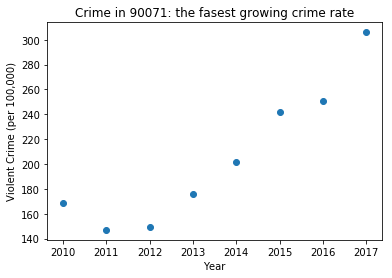

In [131]:
plt.scatter(years, crimes_in_90071)
plt.xlabel("Year")
plt.ylabel("Violent Crime (per 100,000)")
plt.title("Crime in 90071: the fasest growing crime rate")

In [132]:
the90017 = crime_by_year.loc[crime_by_year["Zip Code"]=="90017"]
the90017


,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value
9,14,90017,5.0,6.0,7.0,1.0,5.0,10.0,6.0,124.0,23768.0,21.036688,25.244026,29.451363,4.207338,21.036688,42.073376,25.244026,521.709862,42.3739,-85233.597394,0.124576


In [133]:
crimes_in_90017 = [642, 710,638, 536, 533, 625, 576, 598]

Text(0.5,1,'90017: where crime is declining most rapidly')

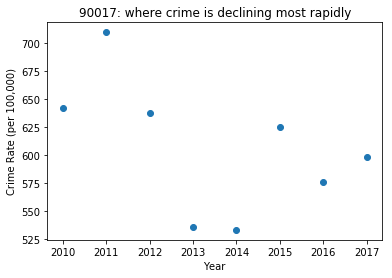

In [161]:
plt.scatter(years, crimes_in_90017)
plt.xlabel("Year")
plt.ylabel("Crime Rate (per 100,000)")
plt.title("90017: seeing a large decline in crime")


In [135]:
crime_by_year.loc[crime_by_year["p value"]<0.05]

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value


In [136]:
crimes_df_wo_2018 = crime_df.loc[crime_df["Year"]!=2018]

In [137]:
property_crime = len(crimes_df_wo_2018) - len(violent_crimes)

In [138]:
property_crime

53834

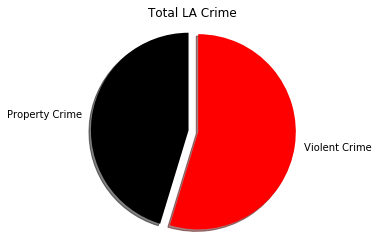

In [149]:
plt.pie([property_crime, len(crimes_df_wo_2018)], labels=["Property Crime", "Violent Crime"], explode=[0, 0.1], colors=["black","red"],shadow=0.3, startangle= 90)
plt.title("Total LA Crime")
plt.axis("equal")
plt.savefig("Total LA crime pie chart.png")

In [140]:
the90042 = crime_by_year.loc[crime_by_year["Zip Code"]=="90042"]
the90042

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value
20,31,90042,5.0,2.0,4.0,1.0,4.0,4.0,6.0,60.0,62430.0,8.00897,3.203588,6.407176,1.601794,6.407176,6.407176,9.610764,96.107641,7.780142,-15648.097298,0.118939


In [141]:
crimes_in_90042 = [378,336,349,287,298,304,264,253]

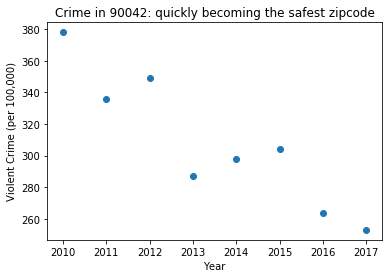

In [160]:
plt.scatter(years, crimes_in_90042)
plt.xlabel("Year")
plt.ylabel("Violent Crime (per 100,000)")
plt.title("Crime in 90042: quickly becoming the safest zipcode")

plt.savefig("90071.png")

In [156]:
sig_crime_by_year = crime_by_year.loc[crime_by_year["p value"]<0.05]
sig_crime_by_year

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value


In [157]:
pos = len(sig_crime_by_year["Slope of Regression"]>0)
neg = len(sig_crime_by_year["Slope of Regression"]<0)

In [ ]:
plt.pie([pos, neg], labels=["Crime Rate Rising", "Crime Rate Declining"])
plt.axis("equal")
plt.title("Changes in Crime Rate (p<0.05)")
plt.savefig("Changes in Crime Rate")

In [164]:
the90006 = crime_by_year.loc[crime_by_year["Zip Code"]=="90006"]
the90006

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,Slope of Regression,Intercept,p value
4,5,90006,1.0,5.0,4.0,3.0,9.0,8.0,30.0,120.0,59185.0,1.689617,8.448087,6.758469,5.068852,15.206556,13.516938,50.688519,202.754076,19.631744,-39490.499926,0.051375


In [165]:
crimes_in_90006 = [1,5,4,3,9,8,30,120]

In [193]:
sp_fit = 19.63 * years-39490.0
#ax8.plot(df.iloc[:,0], sp_fit, 'r--')

In [ ]:
sp_fit = crimes_in_9006["Slope of Regression"]*years+crimes[]

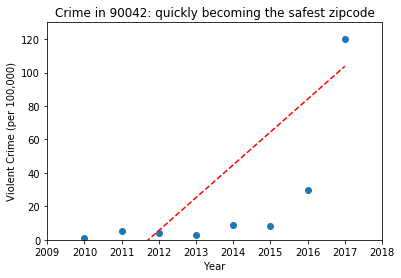

In [194]:
plt.scatter(years, crimes_in_90006)
plt.plot(years,sp_fit,"r--")
plt.xlabel("Year")
plt.ylabel("Violent Crime (per 100,000)")
plt.title("Crime in 90042: quickly becoming the safest zipcode")
plt.xlim(2009,2018)
plt.ylim(0,130)

plt.savefig("90071.png")

In [192]:
years = [2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0]
years = np.array(years)

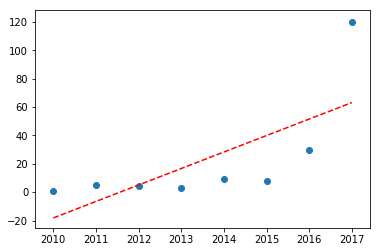

In [200]:
z = np.polyfit(years, crimes_in_90006, 1)
p = np.poly1d(z)
plt.plot(years,p(years),"r--")
plt.scatter(years, crimes_in_90006)
